## Linear Regression Tutorial, Part 3: Categorical Variables

RJ Nowling

In part 1 of this Linear Regression tutorial, we built a simple linear regression model using the squared footage of real eastate to predict the prices of transactions.  In part 2, we built a multiple linear regression model using the continuous variables.  In part 3, we'll look at using categorical variables.

We'll start by importing the various libraries we'll need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Load and Clean Data

Before we can build any models, we need to import the data and clean it by converting types as necessary.

In [2]:
df = pd.read_csv("Sacramentorealestatetransactions.csv")

In [3]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

Let's convert our categorical variables to categories.  We can also treat some of the numerical variables (beds, baths) as categorical variables, so we'll create separate categorical variables for them.

In [5]:
df["beds_cats"] = df["beds"].astype("category")
df["baths_cats"] = df["baths"].astype("category")
df["state"] = df["state"].astype("category")
df["zip"] = df["zip"].astype("category")
df["type"] = df["type"].astype("category")

Let's define lists of the names of our numerical variables, categorical variables, and numerical variables we may want to try as categorical variables.

In [6]:
numerical_columns = ["beds", "baths", "sq__ft", "latitude", "longitude"]
categorical_columns = ["zip", "type", "state", "beds_cats", "baths_cats"]
all_columns = numerical_columns + categorical_columns

Let's explore our categorical columns.

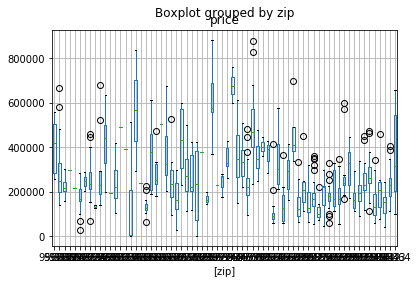

In [7]:
df[["price", "zip"]].boxplot(by="zip")

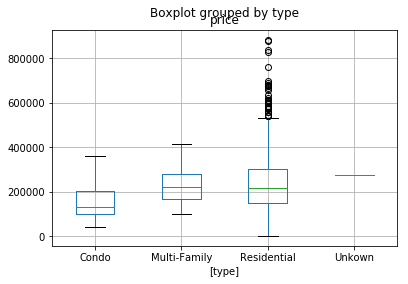

In [8]:
df[["price", "type"]].boxplot(by="type")

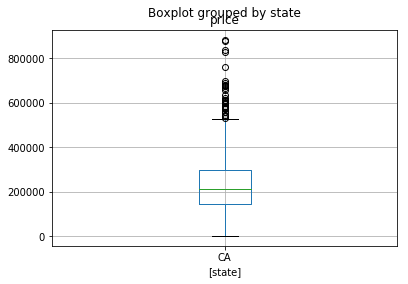

In [9]:
df[["price", "state"]].boxplot(by="state")

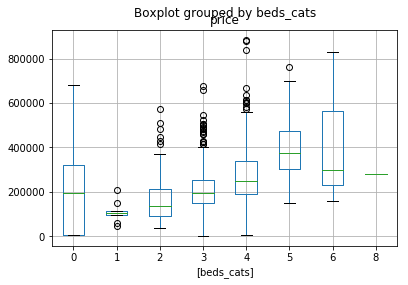

In [10]:
df[["price", "beds_cats"]].boxplot(by="beds_cats")

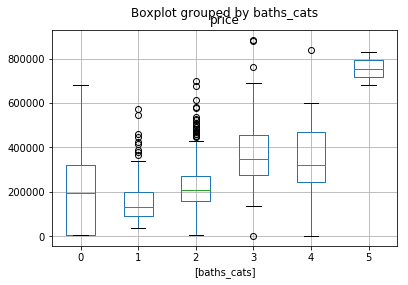

In [11]:
df[["price", "baths_cats"]].boxplot(by="baths_cats")

I believe that `bed_cats`, `bath_cats`, `type`, and `zip` will be predictive.  I do not think state will be predictive since there is only one state.

## Transforming Categorical Variables

Before we can use any of the categorical variables in regression models, we need to conver them to dummy variables.  A dummy variable is created for each category in a variable.  A value of 1 indicates that the record is in that category, while a 0 indicates not.

In [12]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,beds_cats,baths_cats
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,3,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2,1


In [13]:
pd.get_dummies(df["beds_cats"], prefix="beds_cats").head()

,beds_cats_0,beds_cats_1,beds_cats_2,beds_cats_3,beds_cats_4,beds_cats_5,beds_cats_6,beds_cats_8
0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [14]:
df.columns.values

array(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft',
       'type', 'sale_date', 'price', 'latitude', 'longitude', 'beds_cats',
       'baths_cats'], dtype=object)

In [15]:
dummy_columns = {}
for col_name in categorical_columns:
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    dummy_columns[col_name] = dummies.columns.values
    df = df.merge(dummies, left_index=True, right_index=True)
    df = df.drop(columns=col_name)

In [16]:
print(dummy_columns)

{'zip': array(['zip_95603', 'zip_95608', 'zip_95610', 'zip_95614', 'zip_95619',
       'zip_95621', 'zip_95623', 'zip_95624', 'zip_95626', 'zip_95628',
       'zip_95630', 'zip_95631', 'zip_95632', 'zip_95633', 'zip_95635',
       'zip_95648', 'zip_95650', 'zip_95655', 'zip_95660', 'zip_95661',
       'zip_95662', 'zip_95663', 'zip_95667', 'zip_95670', 'zip_95673',
       'zip_95677', 'zip_95678', 'zip_95682', 'zip_95683', 'zip_95690',
       'zip_95691', 'zip_95693', 'zip_95722', 'zip_95726', 'zip_95742',
       'zip_95746', 'zip_95747', 'zip_95757', 'zip_95758', 'zip_95762',
       'zip_95765', 'zip_95811', 'zip_95814', 'zip_95815', 'zip_95816',
       'zip_95817', 'zip_95818', 'zip_95819', 'zip_95820', 'zip_95821',
       'zip_95822', 'zip_95823', 'zip_95824', 'zip_95825', 'zip_95826',
       'zip_95827', 'zip_95828', 'zip_95829', 'zip_95831', 'zip_95832',
       'zip_95833', 'zip_95834', 'zip_95835', 'zip_95838', 'zip_95841',
       'zip_95842', 'zip_95843', 'zip_95864'], dtype=obj

In [17]:
df.head()

,street,city,beds,baths,sq__ft,sale_date,price,latitude,longitude,zip_95603,...,beds_cats_4,beds_cats_5,beds_cats_6,beds_cats_8,baths_cats_0,baths_cats_1,baths_cats_2,baths_cats_3,baths_cats_4,baths_cats_5
0,3526 HIGH ST,SACRAMENTO,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,...,0,0,0,0,0,1,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,...,0,0,0,0,0,1,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,...,0,0,0,0,0,1,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,...,0,0,0,0,0,1,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,...,0,0,0,0,0,1,0,0,0,0


## Experimental Setup

Our goal is to build a predictive model.  Predictive models are applied to data where the outcome variable is unknown.  To accurately evaluate our model, we need to see how it performs on unseen data.  We simulate this by dividing our data set into two groups: a training set (75%) and a testing set (25%).  For this linear regression model, we'll use a simple scheme of random assignment.  

In [18]:
df_train, df_test = train_test_split(df)
print(df.shape[0], df_train.shape[0], df_test.shape[0])

985 738 247


In [19]:
y_train = df_train["price"].values
y_test = df_test["price"].values

## Comparing Beds and Baths as a Numerical Feature vs Categorical Feature

Beds and Baths are both recorded as integers in our original dataset.  However, both variables contain a small number of values and could be interpreted as categorical variables.  Here, we demonstrate both how to use categorical variables by building on set of models where each variable is treated as continuous and a second set where the variables are treated as categorical.  By comparing these models, we see that the predictive power of some variables can be increased by changing their representation.

In [20]:
def create_feature_matrices(df_train, df_test, selected_columns, dummy_columns=None):
    """
    Creates feature matrices for the training and testing sets from the given dataframes.
    The feature matrices are built from the columns given in selected columns.
    """
    
    if dummy_columns is None:
        dummy_columns = dict()
    
    # keep track of numerical features
    numerical_trial_columns = []
    
    # keep track of dummy features for categorical variables
    categorical_trial_columns = []
    
    # build feature lists
    for col_name in selected_columns:
        if col_name in dummy_columns:
            categorical_trial_columns.extend(dummy_columns[col_name])
        else:
            numerical_trial_columns.append(col_name)

    # transform numerical features
    if len(numerical_trial_columns) > 0:
        X_train_numerical = df_train[numerical_trial_columns].astype("float64").values
        X_test_numerical = df_test[numerical_trial_columns].astype("float64").values
    
        imputer = Imputer(missing_values=0)
        X_train_numerical = imputer.fit_transform(X_train_numerical)
        X_test_numerical = imputer.transform(X_test_numerical)
    
        scaler = StandardScaler()
        X_train_numerical = scaler.fit_transform(X_train_numerical)
        X_test_numerical = scaler.transform(X_test_numerical)
    
    # select categorical features
    if len(categorical_trial_columns) > 0:
        X_train_categorical = df_train[categorical_trial_columns].astype("float64").values
        X_test_categorical = df_test[categorical_trial_columns].astype("float64").values
    
    # concatenate feature matrices
    if len(numerical_trial_columns) > 0 and len(categorical_trial_columns) > 0:
        X_train = np.hstack([X_train_numerical, X_train_categorical])
        X_test = np.hstack([X_test_numerical, X_test_categorical])
    elif len(numerical_trial_columns) > 0:
        X_train = X_train_numerical
        X_test = X_test_numerical
    else:
        X_train = X_train_categorical
        X_test = X_test_categorical
        
    return X_train, X_test

In [21]:
zeros_train = np.zeros(df_train.shape)
zeros_test = np.zeros(df_test.shape)
null_lr = SGDRegressor(max_iter=2000)
null_lr.fit(zeros_train, y_train)
pred_prices_null_test = null_lr.predict(zeros_test)
null_mse = mean_squared_error(y_test, pred_prices_null_test)
null_rmse = np.sqrt(null_mse)

print("Null Model MSE:", null_mse)
print("Null Model RMSE:", null_rmse)

Null Model MSE: 19659807000.744835
Null Model RMSE: 140213.43373851464


In [22]:
beds_train, beds_test = create_feature_matrices(df_train, df_test, ["beds"], dummy_columns)

beds_lr = SGDRegressor(max_iter=5000)
beds_lr.fit(beds_train, y_train)
pred_prices_beds_test = beds_lr.predict(beds_test)
beds_mse = mean_squared_error(y_test, pred_prices_beds_test)
beds_rmse = np.sqrt(beds_mse)

print("Beds Model MSE:", beds_mse)
print("Beds Model RMSE:", beds_rmse)

Beds Model MSE: 16942138033.274302
Beds Model RMSE: 130161.96845958616


In [23]:
beds_cats_train, beds_cats_test = create_feature_matrices(df_train, df_test, ["beds_cats"], dummy_columns)

beds_cats_lr = SGDRegressor(max_iter=5000)
beds_cats_lr.fit(beds_cats_train, y_train)
pred_prices_beds_cats_test = beds_cats_lr.predict(beds_cats_test)
beds_cats_mse = mean_squared_error(y_test, pred_prices_beds_cats_test)
beds_cats_rmse = np.sqrt(beds_cats_mse)

print("Beds Categories Model MSE:", beds_cats_mse)
print("Beds Categories Model RMSE:", beds_cats_rmse)

Beds Categories Model MSE: 17801547816.30119
Beds Categories Model RMSE: 133422.44120200016


In [24]:
baths_train, baths_test = create_feature_matrices(df_train, df_test, ["baths"], dummy_columns)

baths_lr = SGDRegressor(max_iter=5000)
baths_lr.fit(baths_train, y_train)
pred_prices_baths_test = baths_lr.predict(baths_test)
baths_mse = mean_squared_error(y_test, pred_prices_baths_test)
baths_rmse = np.sqrt(baths_mse)

print("Baths Model MSE:", baths_mse)
print("Baths Model RMSE:", baths_rmse)

Baths Model MSE: 15776538646.264917
Baths Model RMSE: 125604.69197551864


In [25]:
baths_cats_train, baths_cats_test = create_feature_matrices(df_train, df_test, ["baths_cats"], dummy_columns)

baths_cats_lr = SGDRegressor(max_iter=5000)
baths_cats_lr.fit(baths_cats_train, y_train)
pred_prices_baths_cats_test = baths_cats_lr.predict(baths_cats_test)
baths_cats_mse = mean_squared_error(y_test, pred_prices_baths_cats_test)
baths_cats_rmse = np.sqrt(baths_cats_mse)

print("Baths Categories Model MSE:", baths_cats_mse)
print("Baths Categories Model RMSE:", baths_cats_rmse)

Baths Categories Model MSE: 14480155042.240171
Baths Categories Model RMSE: 120333.5158725123


## Greedy Algorithm for Continuous Features

Here, we present a greedy algorithm for picking the features to include in a model.  The greedy algorithm for building a model has three phases:

1. We build a simple linear regression model for each variable.  We use this model to determine the predictive power of each variable independent of the others.  For each model, we compute the RMSE of the model.
2. We use the RMSEs of the models to sort the variables from lowest error to highest error.
3. We build a new model using a greedy algorithm:
  1. Initialize current model to a "null" model only containing an intercept
  2. For each variable:
     1. Create a new model by adding the variable to the current model
     2. If the RMSE of the new model is lower than the current model, replace the current model with the new model
     3. If the RMSE of the new model is not better, discard the variable

In [26]:
def sort_columns(df_train, df_test, y_train, y_test, all_columns, dummy_columns=None):
    column_rmses = []

    for col_name in all_columns:
        X_train, X_test = create_feature_matrices(df_train,
                                                 df_test,
                                                 [col_name],
                                                 dummy_columns=dummy_columns)
    
        simple_lr = SGDRegressor(max_iter=5000)
        simple_lr.fit(X_train, y_train)
        pred_prices_simple_test = simple_lr.predict(X_test)
        simple_mse = mean_squared_error(y_test, pred_prices_simple_test)
        simple_rmse = np.sqrt(simple_mse)
        print()
        print(col_name + " Model MSE:", simple_mse)
        print(col_name + " Model RMSE:", simple_rmse)
        column_rmses.append((simple_rmse, col_name))
    
    column_rmses.sort(key=lambda p: p[0])
    sorted_columns = [col_name for _, col_name in column_rmses]
    print()
    print("Sorted columns:" + str(sorted_columns))
    
    return sorted_columns

In [27]:
sorted_columns = sort_columns(df_train, df_test, y_train, y_test, all_columns, dummy_columns=dummy_columns)


beds Model MSE: 16942111298.992977
beds Model RMSE: 130161.86576333706

baths Model MSE: 15777658512.8305
baths Model RMSE: 125609.14979741922

sq__ft Model MSE: 13478369428.322561
sq__ft Model RMSE: 116096.37991049748

latitude Model MSE: 19589696642.89999
latitude Model RMSE: 139963.19745883197

longitude Model MSE: 19663459231.195225
longitude Model RMSE: 140226.4569587181

zip Model MSE: 11831315811.483418
zip Model RMSE: 108771.85211020091

type Model MSE: 19517506841.062057
type Model RMSE: 139705.0709210731

state Model MSE: 19659756472.9029
state Model RMSE: 140213.25355651262

beds_cats Model MSE: 17803720201.495342
beds_cats Model RMSE: 133430.58195741838

baths_cats Model MSE: 14481201473.162283
baths_cats Model RMSE: 120337.86383828775

Sorted columns:['zip', 'sq__ft', 'baths_cats', 'baths', 'beds', 'beds_cats', 'type', 'latitude', 'state', 'longitude']


In [28]:
def select_features(df_train, df_test, y_train, y_test, sorted_columns, dummy_columns=None):
    lr = SGDRegressor(max_iter=5000)
    
    train_zeros = np.zeros((y_train.shape[0], 1))
    test_zeros = np.zeros((y_test.shape[0], 1))
    lr.fit(train_zeros, y_train)
    pred_y_test = lr.predict(test_zeros)
    
    null_mse = mean_squared_error(y_test, pred_y_test)
    null_rmse = np.sqrt(null_mse)
    
    base_model_columns = []
    base_rmse = null_rmse
    base_mse = null_mse

    print("Base Model MSE:", base_mse)
    print("Base Model RMSE:", base_rmse)
    print()

    for col_name in sorted_columns:
        # track all column names
        trial_columns = base_model_columns[:]
        trial_columns.append(col_name)

        X_train, X_test = create_feature_matrices(df_train,
                                                  df_test,
                                                  trial_columns,
                                                  dummy_columns=dummy_columns)
    
        lr = SGDRegressor(max_iter=5000)
        lr.fit(X_train, y_train)
        pred_y_test = lr.predict(X_test)
        trial_mse = mean_squared_error(y_test, pred_y_test)
        trial_rmse = np.sqrt(trial_mse)
        print()
        print(str(trial_columns) + " Model MSE:", trial_mse)
        print(str(trial_columns) + " Model RMSE:", trial_rmse)
    
        if trial_rmse < base_rmse:
            print("Updating base model")
            base_rmse = trial_rmse
            base_mse = trial_mse
            base_model_columns = trial_columns
        
        print()
        print("Base Model MSE:", base_mse)
        print("Base Model RMSE:", base_rmse)
        print()
    
    print("Our chosen columns are: " + str(base_model_columns))
    return base_model_columns

In [29]:
selected_columns = select_features(df_train, df_test, y_train, y_test, sorted_columns, dummy_columns=dummy_columns)

Base Model MSE: 19659865232.77058
Base Model RMSE: 140213.64139330588


['zip'] Model MSE: 11831159350.968374
['zip'] Model RMSE: 108771.1328936514
Updating base model

Base Model MSE: 11831159350.968374
Base Model RMSE: 108771.1328936514


['zip', 'sq__ft'] Model MSE: 8648110191.497065
['zip', 'sq__ft'] Model RMSE: 92995.21596026896
Updating base model

Base Model MSE: 8648110191.497065
Base Model RMSE: 92995.21596026896


['zip', 'sq__ft', 'baths_cats'] Model MSE: 8331113852.799097
['zip', 'sq__ft', 'baths_cats'] Model RMSE: 91274.93551243462
Updating base model

Base Model MSE: 8331113852.799097
Base Model RMSE: 91274.93551243462


['zip', 'sq__ft', 'baths_cats', 'baths'] Model MSE: 8364488586.201882
['zip', 'sq__ft', 'baths_cats', 'baths'] Model RMSE: 91457.57806875209

Base Model MSE: 8331113852.799097
Base Model RMSE: 91274.93551243462


['zip', 'sq__ft', 'baths_cats', 'beds'] Model MSE: 8298140911.267707
['zip', 'sq__ft', 'baths_cats', 'beds'] Model RMSE: 91094.13214509323
Updat

In [30]:
X_train, X_test = create_feature_matrices(df_train, df_test, selected_columns, dummy_columns=dummy_columns)

print(X_train.shape, X_test.shape)

lr = SGDRegressor(max_iter=5000)
lr.fit(X_train, y_train)
pred_prices_test = lr.predict(X_test)

mse = mean_squared_error(y_test, pred_prices_test)
rmse = np.sqrt(mse)
print()
print("Model MSE:", mse)
print("Model RMSE:", rmse)

(738, 81) (247, 81)

Model MSE: 8142479708.882816
Model RMSE: 90235.68977340848


Text(0,0.5,'Predicted Price')

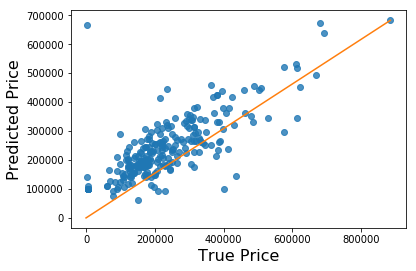

In [31]:
sns.regplot(x=y_test, y=pred_prices_test, fit_reg=False)
plt.plot([0, np.max(y_test)], [0, np.max(pred_prices_test)])
plt.xlabel("True Price", fontsize=16)
plt.ylabel("Predicted Price", fontsize=16)

## All Variables

Lastly, let's build a model containing all of the variables and compare to our model that uses feature selection.

In [32]:
X_train, X_test = create_feature_matrices(df_train, df_test, all_columns, dummy_columns=dummy_columns)

print(X_train.shape, X_test.shape)

lr = SGDRegressor(max_iter=5000)
lr.fit(X_train, y_train)
pred_prices_test = lr.predict(X_test)

mse = mean_squared_error(y_test, pred_prices_test)
rmse = np.sqrt(mse)
print()
print("Model MSE:", mse)
print("Model RMSE:", rmse)

(738, 92) (247, 92)

Model MSE: 8416551234.136207
Model RMSE: 91741.76384905736


Text(0,0.5,'Predicted Price')

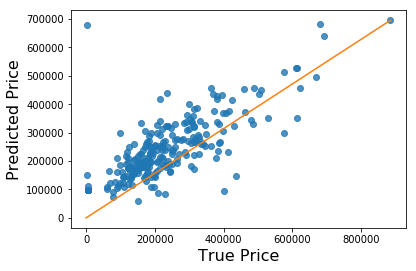

In [33]:
sns.regplot(x=y_test, y=pred_prices_test, fit_reg=False)
plt.plot([0, np.max(y_test)], [0, np.max(pred_prices_test)])
plt.xlabel("True Price", fontsize=16)
plt.ylabel("Predicted Price", fontsize=16)